# Capstone Project 1
Working with NumPy Matrices (NHANES Dataset)
Name: Ganesh Naga Sai Prudhvi Raj Kalidindi
Institution: Gokaraju Rangaraju Institute of Engineering & Technology  

# Overview
This notebook analyzes body measurement data from the National Health and Nutrition
Examination Survey (NHANES, 2020). The dataset contains measurements
of adult male and female participants.

In [46]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Step 1: Loading the NHANES Dataset
The male and female datasets are loaded from CSV files and prepared for analysis.

In [47]:
# Load CSV files
male_df = pd.read_csv("nhanes_adult_male_bmx_2020.csv", comment="#")
female_df = pd.read_csv("nhanes_adult_female_bmx_2020.csv", comment="#")

# Convert to numeric safely
male_df = male_df.apply(pd.to_numeric, errors="coerce").dropna()
female_df = female_df.apply(pd.to_numeric, errors="coerce").dropna()
male = male_df.to_numpy()
female = female_df.to_numpy()
print("Male shape:", male.shape)
print("Female shape:", female.shape)

Male shape: (4081, 7)
Female shape: (4221, 7)


# Step 2: Extracting Weight Measurements
The weight column is extracted from both datasets for further analysis.

In [48]:
# Extract weight column
male_weight = male[:,0]
female_weight = female[:,0]

# Step 3: Weight Distribution Using Histograms
Histograms are used to visualize and compare the weight distributions of male and
female participants. Identical x-axis limits are applied for fair comparison.

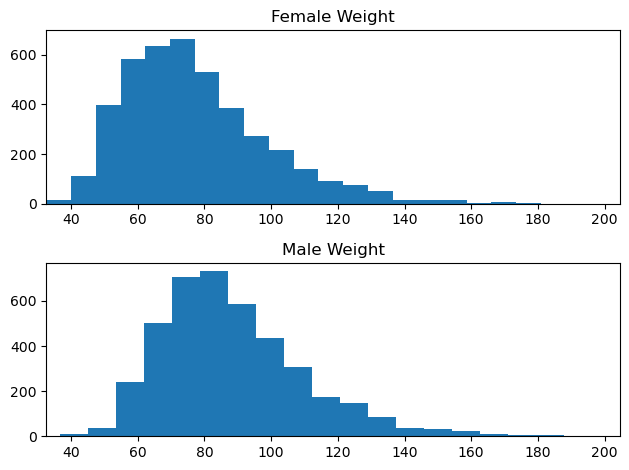

In [49]:
#Histogram
xmin = min(female_weight.min(), male_weight.min())
xmax = max(female_weight.max(), male_weight.max())
plt.subplot(2,1,1)
plt.hist(female_weight, bins=20)
plt.xlim(xmin, xmax)
plt.title("Female Weight")
plt.subplot(2,1,2)
plt.hist(male_weight, bins=20)
plt.xlim(xmin, xmax)
plt.title("Male Weight")
plt.tight_layout()
plt.show()

# Step 4: Boxplot Comparison of Weights
A box-and-whisker plot is used to compare male and female weight distributions.

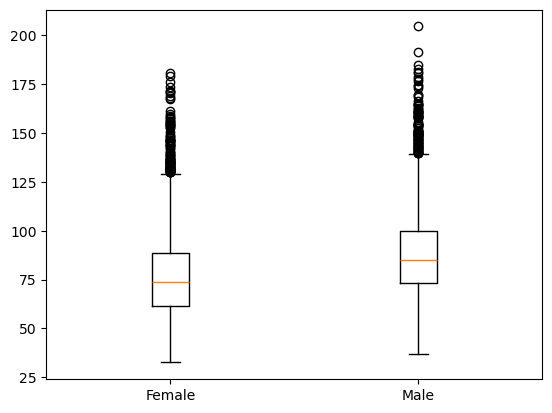

In [50]:
#Boxplot
plt.figure()
plt.boxplot([female_weight, male_weight])
plt.xticks([1,2], ["Female","Male"])
plt.show()

# Step 5: Numerical Aggregates of the Male and Female Weights
Key statistical measures such as mean, median, variance, and standard deviation
are computed for both male and female weights.

In [51]:
print("\nFemale Weight Statistics")
print("Mean:", np.mean(female_weight))
print("Median:", np.median(female_weight))
print("Standard Deviation:", np.std(female_weight, ddof=1))
print("Variance:", np.var(female_weight, ddof=1))
print("\nMale Weight Statistics")
print("Mean:", np.mean(male_weight))
print("Median:", np.median(male_weight))
print("Standard Deviation:", np.std(male_weight, ddof=1))
print("Variance:", np.var(male_weight, ddof=1))


Female Weight Statistics
Mean: 77.40379057095475
Median: 73.6
Standard Deviation: 21.545060568892968
Variance: 464.1896349172665

Male Weight Statistics
Mean: 88.36454300416565
Median: 85.0
Standard Deviation: 21.421561426840427
Variance: 458.8832939638977


# Step 6: Body Mass Index (BMI)
BMI is computed for female participants and added as a new column to the dataset.

In [52]:
# BMI (Female)
height_m = female[:,1] / 100
bmi = female[:,0] / (height_m ** 2)
female = np.column_stack((female, bmi))

# Step 9: Waist-to-Height and Waist-to-Hip Ratios
Waist-to-height and waist-to-hip ratios are computed for both male and female
participants.

In [53]:
# Waist-to-Height & Waist-to-Hip Ratios
# Male ratios
male_whtr = male[:, 6] / male[:, 1]
male_whr  = male[:, 6] / male[:, 5]
# Female ratios
female_whtr = female[:, 6] / female[:, 1]
female_whr  = female[:, 6] / female[:, 5]
# Add ratios as new columns
male = np.column_stack((male, male_whtr, male_whr))
female = np.column_stack((female, female_whtr, female_whr))
print("Male shape after ratios:", male.shape)
print("Female shape after ratios:", female.shape)

Male shape after ratios: (4081, 9)
Female shape after ratios: (4221, 10)


# Step 10: Comparison of Body Ratios
Boxplots are used to compare waist-to-height and waist-to-hip ratios.

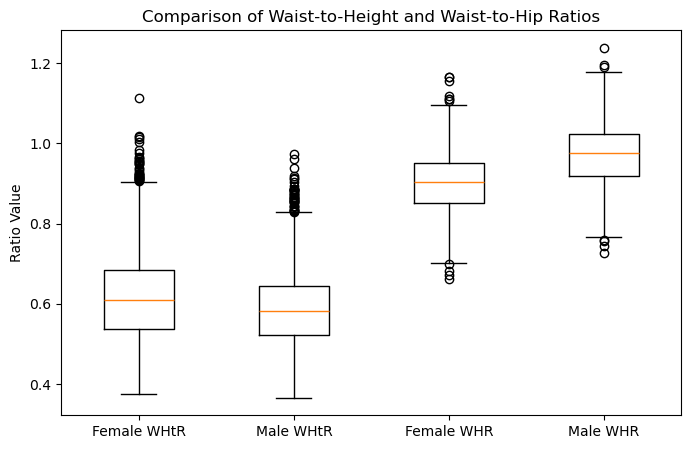

In [54]:
plt.figure(figsize=(8,5))
plt.boxplot(
    [female_whtr, male_whtr, female_whr, male_whr],
    labels=[
        "Female WHtR",
        "Male WHtR",
        "Female WHR",
        "Male WHR"
    ]
)
plt.title("Comparison of Waist-to-Height and Waist-to-Hip Ratios")
plt.ylabel("Ratio Value")
plt.show()

# Step 11: Advantages and Disadvantages of BMI, WHtR, and WHR
Body Mass Index (BMI)  
Advantages:BMI is easy to calculate and is widely used to classify body weight.
It is useful for general comparison across large populations.  
Disadvantages:BMI does not distinguish between fat and muscle and does not
consider how fat is distributed in the body.

Waist-to-Height Ratio (WHtR)
Advantages: WHtR reflects abdominal fat, which is strongly related to health
risks. It is often considered more informative than BMI alone.  
Disadvantages: Accurate waist measurement is required, and standard cut-off
values may vary.

Waist-to-Hip Ratio (WHR)
Advantages: WHR indicates fat distribution around the waist and hips and helps
identify central obesity.  
Disadvantages: It depends on precise waist and hip measurements and may vary
with body shape.

# Step 7 & 12: Standardization and Extreme BMI Values
The female dataset is standardized using z-scores. The standardized measurements
of participants with the lowest and highest BMI values are examined.

In [55]:
# Standardization
zfemale = (female - np.mean(female, axis=0)) / np.std(female, axis=0)
bmi_index = 7
sorted_idx = np.argsort(female[:, bmi_index])
lowest_5_bmi = zfemale[sorted_idx[:5]]
highest_5_bmi = zfemale[sorted_idx[-5:]]
print("\nStandardized measurements of 5 females with LOWEST BMI:")
print(lowest_5_bmi)
print("\nStandardized measurements of 5 females with HIGHEST BMI:")
print(highest_5_bmi)


Standardized measurements of 5 females with LOWEST BMI:
[[-2.07978523 -1.22299143 -1.5478402  -1.16905675 -2.1947611  -2.0405496
  -1.94212128 -2.05024028 -1.74538177 -0.87170621]
 [-1.88017988 -0.18929313 -1.71835247  0.38637892 -2.4443617  -1.85491922
  -2.05708015 -1.99487987 -2.04369083 -1.63576925]
 [-1.53667299  1.80730222  0.62619127  0.5730312  -2.26607556 -1.6756899
  -1.7064556  -1.97088383 -2.01516552 -0.98358297]
 [-1.843044   -0.26009438 -0.22637009  0.51081377 -2.30173278 -2.25178417
  -1.85590213 -1.94177591 -1.82748279 -0.07452609]
 [-1.61094475  0.88688592 -0.09848588  0.47970506 -2.21258971 -1.82931504
  -1.71220354 -1.89319577 -1.87684602 -0.65912886]]

Standardized measurements of 5 females with HIGHEST BMI:
[[ 4.2472403   0.29215539  1.86240524 -0.98240447  2.3693641   4.10445598
   3.81731803  4.39649161  3.71218972  0.71350043]
 [ 4.45612963  0.50455915  1.69189297 -1.13794804  3.34993787  3.98283607
   2.90339503  4.46201122  2.72686922 -0.42446668]
 [ 4.349363

# Step 8: Scatterplot Matrix
A scatterplot matrix is created using standardized female body measurements.

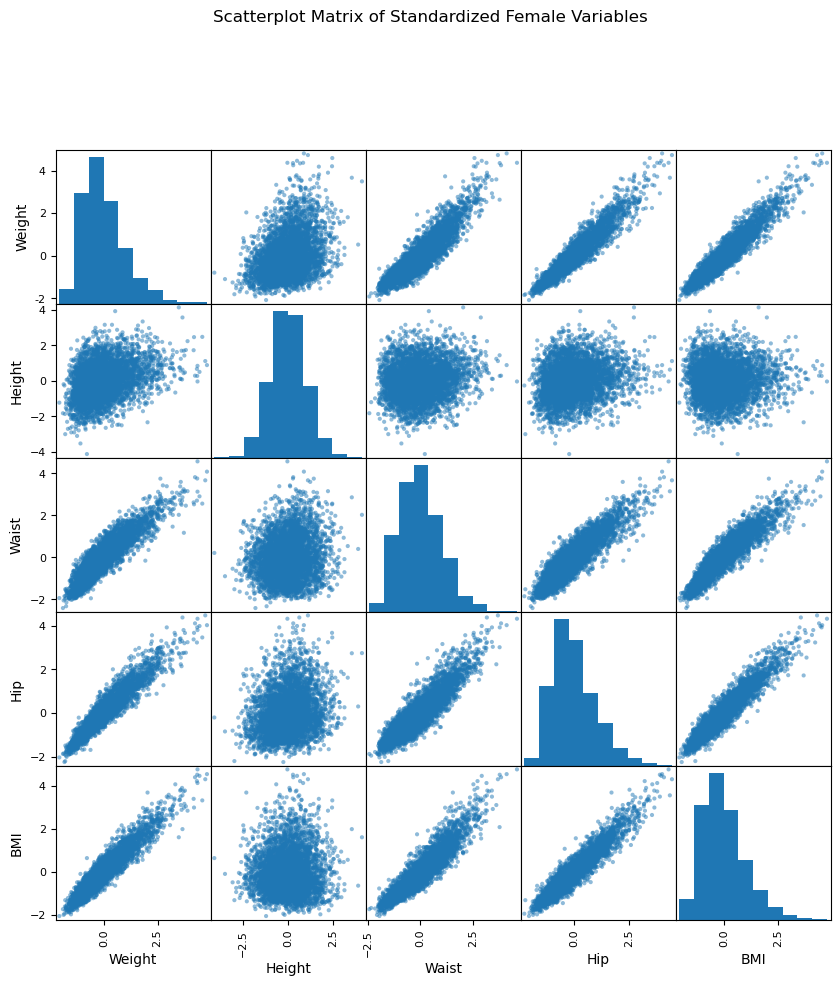

In [56]:
zfemale_df = pd.DataFrame(
    zfemale[:, [0, 1, 6, 5, 7]],
    columns=["Weight", "Height", "Waist", "Hip", "BMI"]
)
pd.plotting.scatter_matrix(zfemale_df, figsize=(10,10))
plt.suptitle("Scatterplot Matrix of Standardized Female Variables", y=1.02)
plt.show()

# Correlation Analysis
Pearson’s and Spearman’s correlation coefficients are computed to examine the
relationships between standardized body measurements. Pearson’s correlation
measures linear relationships, while Spearman’s correlation measures rank-based
(monotonic) relationships.

In [59]:
df = pd.DataFrame(zfemale[:,[0,1,6,5,-1]],
                  columns=["Weight","Height","Waist","Hip","BMI"])
print("Pearson Correlation Matrix")
print(df.corr(method="pearson"))

print("\nSpearman Correlation Matrix")
print(df.corr(method="spearman"))


Pearson Correlation Matrix
          Weight    Height     Waist       Hip       BMI
Weight  1.000000  0.345496  0.904550  0.946553  0.308968
Height  0.345496  1.000000  0.126547  0.202895 -0.098217
Waist   0.904550  0.126547  1.000000  0.897407  0.610348
Hip     0.946553  0.202895  0.897407  1.000000  0.203647
BMI     0.308968 -0.098217  0.610348  0.203647  1.000000

Spearman Correlation Matrix
          Weight    Height     Waist       Hip       BMI
Weight  1.000000  0.338860  0.900169  0.946634  0.343741
Height  0.338860  1.000000  0.108587  0.205405 -0.097060
Waist   0.900169  0.108587  1.000000  0.888037  0.632752
Hip     0.946634  0.205405  0.888037  1.000000  0.241801
BMI     0.343741 -0.097060  0.632752  0.241801  1.000000


# Step 13: Hypothesis Testing Using T-Test

In [58]:
t, p = stats.ttest_ind(male_weight, female_weight)
print("T value:", t)
print("P value:", p)

T value: 23.23891854704478
P value: 8.632404230362208e-116


# Conclusion
This notebook followed the assignment structure to analyze NHANES body measurement
data using numerical, visual, and statistical methods.